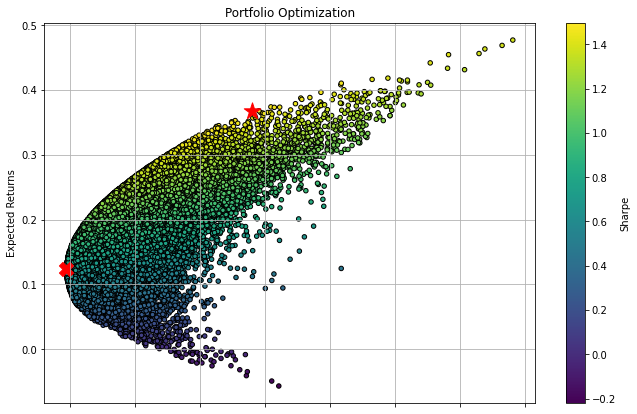

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']
  
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = []
sharpe_ratio = [] 

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)  # 포트폴리오의 수익률을 리스트로 나눈 값

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]  # 샤프 지수를 df에 추가 

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # 샤프 지수 칼럼에서 샤프 지수값이 가장 큰 행을 max_sharpe
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # 리스크값이 가장 작은 행을 min_risk

df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
    edgecolors='k', figsize=(11,7), grid=True)  # 컬러맵을 viridis로 표기하고 테두리를 검정으로 표기
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', 
    marker='*', s=300)  # 샤프 지수가 가장 큰 포트폴리오를 별표로 표기
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', 
    marker='X', s=200)  # 리스크가 제일 작은 포트폴리오를 x로 표기
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

리스크당 수익률이 가장 큰 포트폴리오는 24%의 변동률을 겪으면서 36%의 수익률을 얻었다. 비중은 현대자동차 비율이 가장 높다.

In [2]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,현대자동차,NAVER
819,0.366957,0.244985,1.497875,0.001664,0.65288,0.327984,0.017473


리스크가 가장 적은 포트폴리오는 17% 리스크에 12%의 수익률을 올렸다.

In [3]:
min_risk

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,현대자동차,NAVER
488,0.123308,0.173486,0.710766,0.270318,0.101662,0.355047,0.272973
